<a href="https://colab.research.google.com/github/Sakshi-Taware/OIBSIP/blob/main/unemplopment_analysis_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                   **OSASIS INFOBYTE INTERNSHIP** 

# **TASK 2: Unemployment Analysis with Python**

**Name: SAKSHI SUNIL TAWARE**

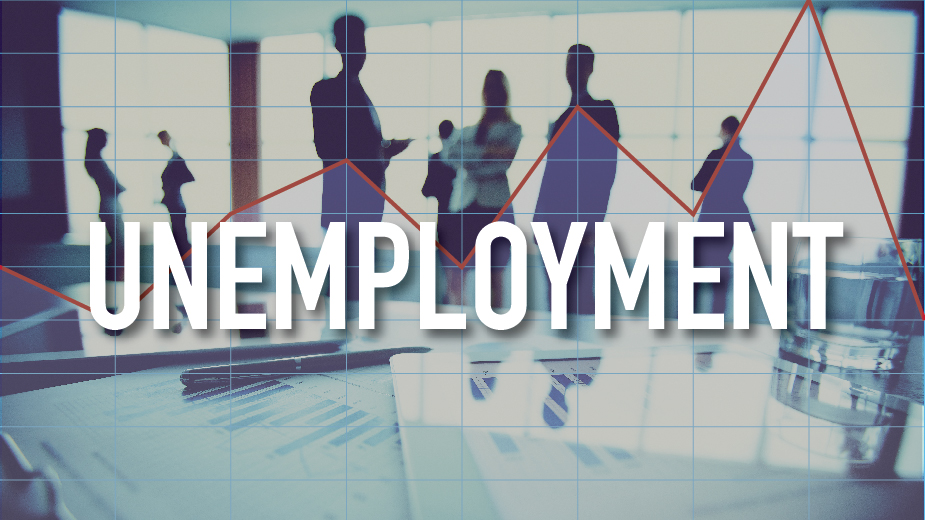

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt
import calendar


In [ ]:
df= pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
# check for null values

In [ ]:
df.isnull().sum()

In [ ]:
# update column names
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]

In [ ]:
print(df)

In [ ]:
#correlation 

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.show()

In [ ]:
# create a new column for month

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])


df.head()

In [ ]:
#look at estimated number of employee according to different regions of India
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude",'month_int','month']
plt.title("Indian Employment")
sns.histplot(x="estimated employed",hue ="region",data=df)
plt.show()

In [ ]:
#see umemployment rate according to different regions of India
plt.title("Indian Unemployment Analysis in COVID period")
sns.histplot(x="estimated unemployment rate",hue ="region",data=df)
plt.show()

In [ ]:
#create a dashboard for analysing
unemployment= df[["state","region","estimated unemployment rate"]]
figure = px.sunburst(unemployment,path=["region","state"],values="estimated unemployment rate", width=700, height=700,
                     color_continuous_scale="RdY1Gn", title="Unemployment rate in India")
figure.show()


In [ ]:
#Monthly unemployment rate
fig = px.scatter_geo(df,'longitude', 'latitude', color="state",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',title='Impack of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

### Unemployment rate before and after Lockdown

In [ ]:
# data p

before_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <4)]
after_lockdown = df[(df['month_int'] >= 4) & (df['month_int'] <=6)]

In [ ]:

af_lockdown = after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()

lockdown = before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate after lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns = ['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

In [ ]:
lockdown.info()

In [ ]:
# Unemployment rate change after lockdown

lockdown['rate change in unemployment'] = round(lockdown['unemployment rate after lockdown'] - lockdown['unemployment rate before lockdown']
                                                /lockdown['unemployment rate before lockdown'],2)


In [ ]:
fig = px.bar(lockdown, x='state',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown', template="ggplot2")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()


Thank you!